# An Introduction to Regression in Python

In this tutorial we will cover regression, starting from the basics to a few advanced features.  This tutorial will focus on classical and statistical rigourous methods.  We will make use of statistical tests throughout.

## Material

* Definition of a Statistical Model
* Maximum Likelihood Estimation - A Review
    * Ratios
    * percentages
    * point estimation
    * pre-bayesian analysis
* Linear Regression
    * the OLS algorithm
        * newton's method
        * stochastic gradient descent
    * Parameter testing
        * t-tests
        * f-tests
    * Goodness of fit measures
        * KL-Divergence
        * AIC
        * BIC
        * R^2
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * linear - linear model
        * log - linear model
        * linear - log model
        * log - log model
        * linear - exponential model
* Generalized Least Squares
    * Distributions - digression (as a model)
        * gaussian
        * poisson
        * gamma
    * Parameter testing
    * Goodness of fit
        * Mean Squared Error
        * Mean Absolute Error
    * Parameter Interpretation
        * gaussian 
        * poisson
        * gamma
* Hierarchical Data
    * groupby - digression
    * fixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
    * mixed effects model
        * parameter testing
        * goodness of fit
        * parameter interpretation
* Regularization
    * distance functions - digression
        * triangle inequality
        * euclidean distance
        * manhattan distance
    * L1 regularization with OLS
    * L2 regularization with OLS
    * Lasso Regression
    * Ridge Regression
    * ElasticNet Regression

https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html

http://datacognizant.com/index.php/ml-algorithms-decoded/

http://www.math.wm.edu/~leemis/chart/UDR/UDR.html

https://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/

http://www.stat.tamu.edu/~twehrly/611/distab.pdf


# Defining a Statistical Model

In the most general sense, the goal of statistics is understand the world around us.  Often times, to do this, we come up with a mental model of the world, from data.  If our data is of a high quality and is an accurate reflection of the world around us, the model we come up with can possibly be an accurate reflection of the world, rather than meaningless symbols or "just notation".  

With a well informed model, we can simulate the underlying phenomenon we captured data on, either extrapolating into the future what might happen in the real world, understanding what's happening now, even if we can't directly observe it, or being able to automate away an extremely hard task.  

Statistical models allow us to ask - 

* What if?
* What's happening now?
* Why is it happening?

And actually come up with answers that might be reasonable!  

Additionally, statistical models allow us to automate tasks that appear like science fiction; we can teach robots to simulate processes of cognition like sight, hearing, and speech.  

In order to understand how these models work, we'll need quite a bit of mathematical rigour, but the pay off will be the ability to simulate and understand the world around us through computation.

# Maximum Likelihood Estimation

Before we start introducing statistical models, we need the right mental model of what a statistical model is and does.  For this we turn to maximum likelihood estimation.  You may recall from last time that maximum likelihood estimation can be used to find the shape parameters of a distribution.  Recall that the shape parameters are merely the associated measures of center, spread, skew, kurtosis and higher order terms that allow us to easily define an accurate description of the underlying data through a process that generates data similar to the distribution of values seen.

Realize, that given the above description, we've already seen our first statistical model - the process (or mathematical formula) that generates a distribution of data via sampling.

Let's review with a few examples to see this in action:

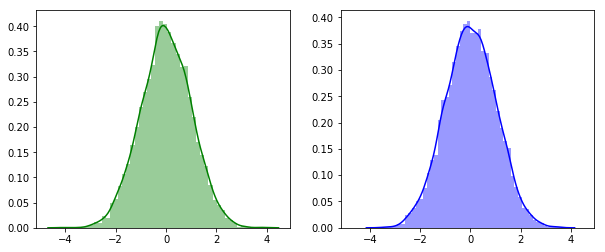

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

data = np.random.normal(0, 1, size=10000)
center, spread = stats.norm.fit(data)
simulated_data = np.random.normal(center, spread, size=10000)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( data , color="green", ax=axes[0])
sns.distplot( simulated_data , color="blue", ax=axes[1])
plt.show()

As you can see here there is very little difference between the simulated data and or original source!  This is because we made a few assumptions:

1. we assumed a normal distribution when simulating our data
2. we assumed we had enough original data to come up with reasonable shape parameters

We can even go further to verify that this is the case by overlapping the two distributions:

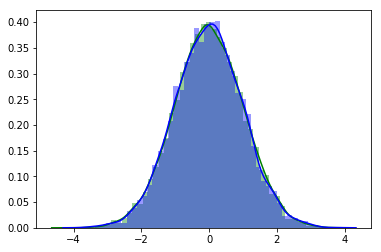

In [7]:
sns.distplot( data , color="green")
sns.distplot( simulated_data , color="blue")
plt.show()

In general, this leads us to a conclusion - we can think of the underlying distribution that our most closely resembles as sort of a mental model for our real world phenomenon.  By understanding the underlying distribution that creates our process, in this case a normal distribution, we can simulate accurate representations of our underlying process, by only knowing the center and spread of the data!

Let's take a real world example:

In [4]:
crashes = sns.load_dataset("car_crashes")
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [24]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats.stats:

normaltest(a, axis=0, nan_policy='propagate')
    Test whether a sample differs from a normal distribution.
    
    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.
    
    
    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, optional
        Axis along which to compute test. Default is 0. If None,
        compute over the whole array `a`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        ``s^2 + k^2``, wh

We first recall the null hypothesis of the test, in this case, the null hypothesis is that the data is normally distributed.

In [28]:
stats.normaltest(crashes["total"])

NormaltestResult(statistic=0.19732083699768993, pvalue=0.9060503337210413)

Next we verify that our data is normally distributed.  With a p-value of 0.906 we fail to reject the null hypothesis somewhat strongly and therfore we can guess the data is likely normally distributed.  Now, let's see if we can generate more data:

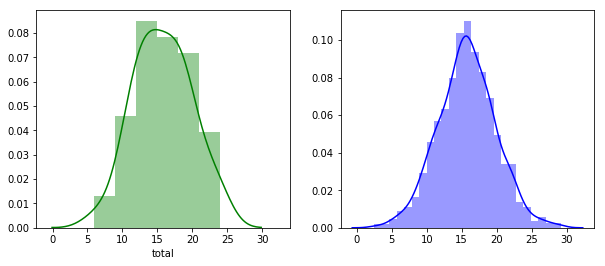

In [33]:
center, spread = stats.norm.fit(crashes["total"])
simulated_crash_totals = np.random.normal(center, spread, size=len(crashes)*20)
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( crashes["total"] , color="green", ax=axes[0])
sns.distplot( simulated_crash_totals , color="blue", ax=axes[1])
plt.show()

As you can see, there isn't an exact match but the center and spread are approximately the same.  This graph shows us, assuming we trust our data, what it would be likely if more countries had car policies and infrastructure similar to the USA with respect to car saftey?  We can see, it would be likely that the maximum number of deaths per billion miles would likely have a high end of around 30 and a low end of close to zero.

Source of data: http://seaborn.pydata.org/examples/horizontal_barplot.html?highlight=car%20crashes

## The Connection Between Likelihood and Probability

Before we leave our high level discussion, there is an important point to make - 

$$ Likelihood(data | \mu, \sigma) \neq Probability(\mu, \sigma | data) $$

This is because with the likelihood we ask, what are the most likely shape parameters that could have generated this data?  With the probability we ask, given these shape parameters what is the probability we saw this data?

So we can think of these as two sides of the same coin for estimation purposes.

Let's see what the probability would look like in python:

Source: https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

In [39]:
def probability(mu, sigma, data):
    simulated_data = np.random.normal(mu, sigma, size=len(data))
    return stats.ttest_ind(simulated_data, data)[1]

data = np.random.normal(0, 1, size=10000)
mu_guess = 0
sigma_guess = 1
probability(mu_guess, sigma_guess, data)
# probability that given these shape parameters we saw this data

0.8624157075606645

# The problem with percentages

Depending on the units you are talking about 5% or 8% could be a huge amount or a very small amount.  It all comes down to what you are talking about.  For instance, most economists agree a health economy grows at around 2% per year!  This number feels small, until you consider what 2% means for the US economy or other developed nations.

If the US economy grows 2% this year that will mean it grows approximately:

388 billion dollars

We also experience this problem with the rareity of an event:

What is the probability that any of microsoft's servers fails in the next hour given that the probability a given server fails is 0.01%?  

Well that depends on something very important: how many servers do we have?  I personally don't know the exact number but a safe guess in order of magnitude is something like:

$80,000 servers * 8 data centers * 5 availability zones * 24 regions \approx$ 

77 million!!!

We can figure this out by multiplying the probability a server fails times the number of servers:

7700.0

So around 8,000 will fail in the next hour alone!!  I certainly wouldn't have guessed that from the probability of an individual server.

Source: https://www.forbes.com/sites/johnsonpierr/2017/06/15/with-the-public-clouds-of-amazon-microsoft-and-google-big-data-is-the-proverbial-big-deal/#6e5918692ac3

We also experience this problem with floating point numbers in computation.  Because the size of computers are finite, they cannot represent the full precision of values which sometimes means our statistical algorithms don't converge, even when they should theoretically!!

So sometimes, the numbers themselves aren't precise enough for us to do mathematics properly.  

## The Flaw in MLE

The reason I bring all this up, is because of how Maximum Likelihood Estimation is done:

We take an estimate by looking for the choice of shape parameters which maximize the likelihood, but the likelihood is like a probability, it works over a percentage or fraction.  It chooses its parameters by taking a "best" guess.  But the truth is there may be much higher confidence by just taking a small range of values around a desired level of acceptability, rather than insisting on a point estimate that maximizes things.

To understand this, let's look at test scores:

Say we had a class of students and we wanted to choose the folks who did well in the course.  First let's try to pick all those who scored in the top 10% of the class.  And then let's try to pick all those who got 90% or above of the total points available for the course:

In [51]:
scores = np.random.normal(75, 25, size=10000)
scores = scores[scores < 100]

In [55]:
print("Students who scored in the top 10 percentile", len(scores[scores > np.percentile(scores, 90)]))
print("Students who got a score of 90% or better", len(scores[scores >= 90]))

Students who scored in the top 10 percentile 841
Students who got a score of 90% or better 1145


Notice there is an important difference there!  This is because the semantics matter a lot and by picking hard cut offs for what "best" means we limit ourselves slavishly to the misunderstandings of the representations of semantics numerically.

Let's take a closer look at the distribution of scores:

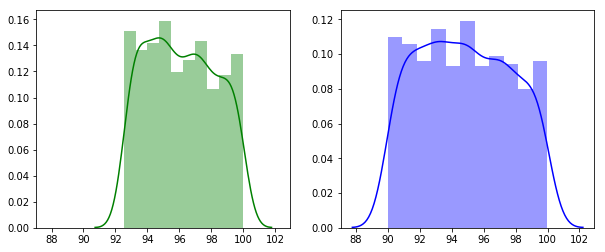

In [56]:
top_10 = scores[scores > np.percentile(scores, 90)]
top_90 = scores[scores > 90]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

With this theoretical example, are the kids on the left "really" any smarter than the kids on the right?  Absolutely not!  And yet some of them would get an A and some of them would get a B based on these cut offs.  

Let's say this were a university course, that might be the difference between getting into graduate school or not, for at least some of these students.  And that's because the semantics of what an A means varies wildly across different universities and different professors.  

To summarize, so this is the issue with point estimates:

Numbers are precise, but humans are not usually and even then, because we are doing math on computers, we lose some precision.  So taking a point estimate may not always give you what you want.  It does okay, but you might miss out on a lot of important stuff.  And if you aren't careful, you could get something very important wrong, which could be highly dependent on your use case.

## How We Can Correct This

One of these easiest ways to do this is to go bayesian.  I won't explain all the theory behind it, but basically bayesians say, instead of taking a point estimate, we take a bunch of points around what we think is a good point estimate.  This allows us to be wrong, allows us to be surprised and most importantly, allows us to still learn things, without throwing out the good stuff.

So if we used a bayesian mindset for the above example, we'd say:

Give me everything around the 90th percentile and give me everything around people that scored 90% percent of the points or better:

In [57]:
print("Students who scored around the top 10 percentile", len(scores[scores > np.percentile(scores, 85)]))
print("Students who got around a score of 90% or better", len(scores[scores >= 85]))

Students who scored around the top 10 percentile 1261
Students who got around a score of 90% or better 1817


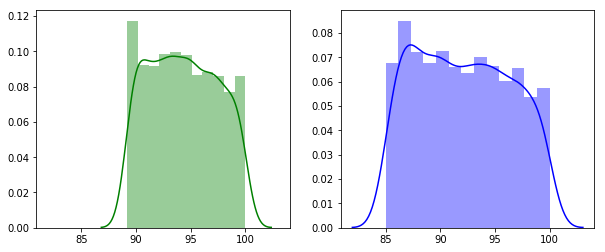

In [58]:
top_10 = scores[scores > np.percentile(scores, 85)]
top_90 = scores[scores > 85]
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot( top_10 , color="green", ax=axes[0])
sns.distplot( top_90 , color="blue", ax=axes[1])
plt.show()

So functionally what did we do?  We gave ourselves some slack.  We didn't pick the exact number we were shooting for.  But what does that give us?  Well for instance, by choosing the top 85% we can now see more data and then make an informed choice about individual students that may or may not deserve an A.  Now we can factor in how hard those students at the bottom worked to get that overall score of 85 or to get into the top 85% percentile.  And then we can make a value judgement, based on domain expertise about who deserves an A in the course!

Notice - we lose precision in our point estimate, because now things are more fuzzy.  But!  We gain the ability to be more discerning about our data, our model, and our results.

In the remainder of the lecture, we'll see how point estimates try to account directly for this by looking at the shape parameters of the distribution of errors during training and how this can help inform the models we create!

## Linear Regression 

Linear Regression is one of the simplest and most interpretable models there is.  Before we dive into it's specifics, let's first see how it relates to maximum likelihood estimation:

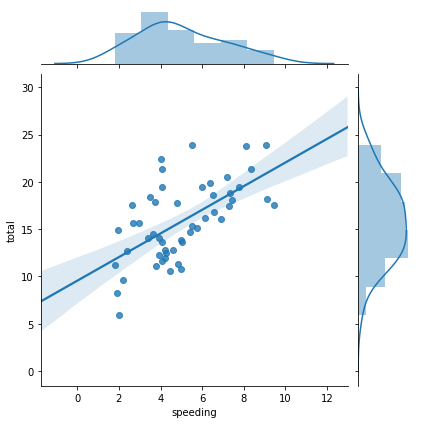

In [63]:
sns.jointplot(x="speeding", y="total", data=crashes, kind="reg")
plt.show()

Here we see the joint distribution of car crashes where the driver was speeding per billion miles and the total car crashes per billion miles.  By looking at the blue shaded line we see the joint simulated distribution from the relationship between the shape parameters of the shared distribution.  Additionally, we see the point estimate - the maximum likelihood estimation - the dark blue line cutting through the data.

The reason why a distribution like this:

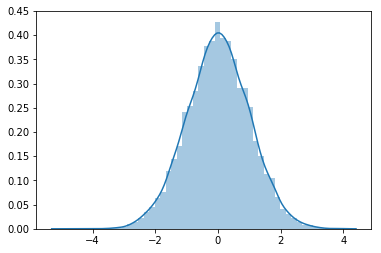

In [66]:
data = np.random.normal(0, 1, size=10000)
sns.distplot(data)
plt.show()

is simple - it's because the maximum point estimate for this distribution is where the majority of the top of the theoretical curve that represents the shape of the distribution.  In other words, the MLE takes the highest point of the distribution.  In two dimensional space, this is represented as a line as the above picture shows.

## The Ordinary Least Squares Algorithm

The Ordinary Least Squares Algorithm is probably the simplest thing you could think of - Here is the psuedo code for the algorithm:

1. start with a line cutting through the data (perhaps pick two random points in the space and draw a line through them)
2. look at the difference between all the points and the line
3. update the line such that the sum of the squared differences is made smaller
4. repeat until the sum of squared differences is as small as possible

There are lots of ways to implement this, we'll look at a few methods here:

### A Brief Digression - Newton - Raphson's Method

Before we go through Stochastic Gradient Descent, let's start by looking at a simplier method for approximating values.

Newton-Raphson's Method is based on the notion that we can guess and check our way to the solution of a minimization or maximization problem through iteration.  

This method can be used to approximate the roots of any real valued function.

The way the method works is as follows:

1. Initialize a guess root $x_{0}$
2. Calculate the derivative with respect to the function
3. Update our guess by $x_{i} = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}$
4. Once the change between $x_{i}$ and $x_{i-1}$ is neglible then we quit

In [1]:
from IPython.display import HTML
HTML('<img src="NewtonIteration_Ani.gif">')

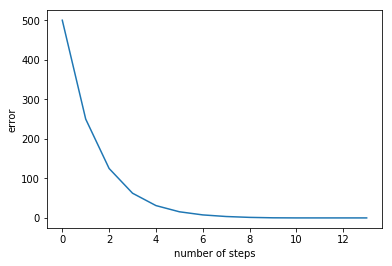

In [1]:
from hackthederivative import complex_step_finite_diff as differentiate
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

def newton_raphson_method(x_0, f, tolerance=1e-10, max_iter=1e5):
    fprime = partial(differentiate, f)
    x_cur = 100000000000
    x_prev = x_0
    count = 0
    error = []
    while True:
        x_cur = x_prev - (f(x_prev) / fprime(x_prev))
        error.append(abs(x_prev - x_cur))
        if abs(x_prev - x_cur) < tolerance:
            break
        x_prev = x_cur
        count += 1
        if count > max_iter:
            break
    return x_cur, error
    
root, error = newton_raphson_method(1000, lambda x: x**2 - 9)
plt.plot(error)
pylab.xlabel('number of steps')
pylab.ylabel("error")
plt.show()

While the method we will use for ordinary least squares is somewhat different in how it's computed, two conceptual themes will remain consistent - we can use a derivative to drive our model closer to an optimum.  And second, as our model updates, we will (hopefully) reduce the amount of error in our guess.

## Gradient Descent

Gradient Descent, like Newton-Raphson can be used to guess values that optimize some problem.  The general problem Gradient Descent solves is that of maximum likelihood estimation.  

There are two main ways the algorithm can be implemented:

1. Via Linear Algebra
2. Via Calculus 

Of the two methods above typically the Linear Algebra solution is used in practice, but is far harder to understand than it's Calculus equivalent.  Let's look at the Calculus version below:

Gradient Descent requires a cost function.  The cost function used will give us the gradients that we will use to do our updating of our model parameters.  Generally speaking, a cost function is answering the question of how far apart our model prediction is from what was actually seen in the data?  This means, cost functions are typically described in terms of total distance from our predictions to the observed values from the data.  Thus in general our Gradient Descent algorithm looks like this:

1. Initialize our model parameters with random values
2. Calculate the gradient by summing the partial derivatives of the cost function for each parameter
3. Update each parameter by subtracting off the partial derivative with respect to that parameter 
4. Continue until error is minimized with respect to all parameters

Notice the similarities between this method and Newton-Raphson, these are the steps of the two algorithms in general:

1. initialize with some random guess
2. calculate a derivative
3. update based on that derivative
4. continue until the error becomes neglible

Now let's look at how to implement gradient descent for ordinary least squares:


Reference:

[ML Cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

In [10]:
import math
import random

def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / N) * learning_rate
    b -= (b_deriv / N) * learning_rate
    
    return m, b

def cost_function(m, b, X, y):
    N = len(X)
    total_cost = 0
    for i in range(N):
        total_cost += math.pow((y[i] - (m*X[i] + b)), 2)
    return total_cost / N

def gradient_descent(X, y, learning_rate=0.001, tolerance=1e-2, max_iter=1e5):
    m = 0
    b = 0
    error = []
    count = 0
    while True:
        prev_cost = cost_function(m, b, X, y)
        m, b = update_weights(m, b, X, y, learning_rate)
        cur_cost = cost_function(m, b, X, y)
        error.append(cur_cost)
        count += 1
        if cur_cost < tolerance:
            break
        if count > max_iter:
            break
    return m, b, error
    
X = [random.randint(1, 10)+random.random()*10 for _ in range(1000)]
y = [4 + 3*X[i] + random.random() for i in range(len(X))]
m, b, error = gradient_descent(X, y)
y_predict = [m*X[i]+b for i in range(len(X))]

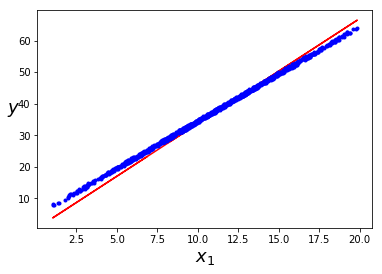

In [8]:
plt.plot(X,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.show()

As we can see, our algorithm does quiet well!

## Working With Libraries


Now let's look at an example using a library (which you'll usually do) to do linear regression:

In [89]:
import statsmodels.api as sm

crashes = sns.load_dataset("car_crashes")
speeding = sm.add_constant(crashes["speeding"])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.87e-06
Time:                        16:05:29   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5459      1.243      7.680      0.000       7.048      12.044
speeding       1.2493      0.231      5.411      0.000       0.785       1.713
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.681
Skew:                           0.542   Prob(JB):                        0.262
Kurtosis:                       2.709   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## T-Tests and F-Tests

Let's start by understanding what the "t-test" and the "f-test" mean in this context.  If you recall from last time, in general the t-test is used to test whether or not two different samples come from the same distribution.  In this case the "t-test" tests the null hypothesis that the given independent variable is different from zero.  So if we reject the null hypothesis, in this case, it is different than zero.

Likewise for the "F-test", in general it tests if 2 or more variables come from the same population.  In this case, the null hypothesis states that all the variables jointly equal zero or in otherwords, contribute nothing to the explaination of the y variable.

To be specific, in the above example with respect to the t-tests:

We reject the null hypothesis both times, therefore speeding and the constant term both are different than zero.  This means there is some bias term that is constant and speeding both contribute statistically to the explaination of total car crashes per billion miles.

We also reject the null hypothesis that the variables jointly are zero and therefore the model does have statistical meaning.

Source: https://stats.stackexchange.com/questions/59250/how-to-interpret-the-output-of-the-summary-method-for-an-lm-object-in-r

## Goodness of fit measures

The next two measures we will look at are Akaike Information Criterion and Bayesian Information Criterion, but first we will look at the algorithm that underlies them both: KL - Divergence

### Digression - KL-Divergence

Kullback Liebler divergence is, like many other things in statistics a way of measuring how different two distributions are.  But the way it asks the question and the uses of KL-Divergence are surprisingly rich.  Checkout this quote from wikipedia:

"Expressed in the language of Bayesian inference, ${\displaystyle D_{\text{KL}}(P\parallel Q)}$  is a measure of the information gained when one revises one's beliefs from the prior probability distribution Q to the posterior probability distribution P.  In other words, it is the amount of information lost when Q is used to approximate P.  In applications, P typically represents the "true" distribution of data, observations, or a precisely calculated theoretical distribution, while Q typically represents a theory, model, description, or approximation of P.  In order to find a distribution Q that is closest to P, we can minimize KL divergence and compute an information projection."

Source: https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

While this feels like a restatement of ks_2sample with fewer guarantees:

1. it's assymetric => ${\displaystyle D_{\text{KL}}(P\parallel Q)} \neq {\displaystyle D_{\text{KL}}(Q\parallel P)}$

2. there is no guarantee that comparisons between different paired distributions will have an ordering:

I.E. if we have: 

${\displaystyle D_{\text{KL}}(P\parallel Q)} = 5$

${\displaystyle D_{\text{KL}}(Q\parallel R)} = 7$

It is not the case that:

${\displaystyle D_{\text{KL}}(P\parallel Q)} \lt {\displaystyle D_{\text{KL}}(Q\parallel R)}$

And further more:

${\displaystyle D_{\text{KL}}(P\parallel R)} \neq 12$

And yet!

KL-Divergence is **_powerful_**.  To summarize, once of the ways we can use it:

* compare the divergence between two distributions _regardless_ of distribution shape.

Consider the following case:

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


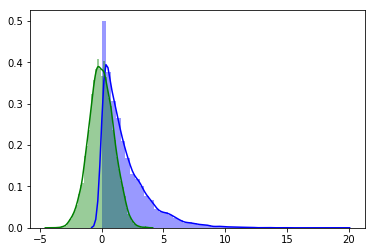

In [90]:
normal_dist = np.random.normal(0, 1, size=10000)
exponential_dist = np.random.exponential(1.9, size=10000)
sns.distplot( exponential_dist , color="blue")
sns.distplot( normal_dist , color="green")

plt.show()

We can use KL-Divergence to measure how different these really are!!!

In [92]:
t1 = stats.norm(0, 1)
t2 = stats.expon(1.9)

# domain to evaluate PDF on
x = np.linspace(-5, 5, 100)
stats.entropy(t1.pdf(x), t2.pdf(x))

inf

Perhaps surprisingly, the divergence is infinite!  Despite these two distributions appearing very similar, they are definitely different!  This gives us more reason to believe that we shouldn't always trust, even precise pictures.

Another important use of KL-Divergence is telling you by how much you are off from a theoretical optimum.  In other words, if we have enough information, it tells us how much we don't know.  

The interested, there are even more examples found here: 
    
https://www.programcreek.com/python/example/62037/scipy.stats.entropy
        

## Akaike Information Criterion && Bayesian Information Criterion

The AIC is another one of those tools that helps assess how well the model does.  It is an application of KL-divergence.  The way it does this is by looking at the overall goodness of fit of the model.  The smaller the AIC, the better the model fits the data.  And if a model has lots of parameters the score will always be higher, so this is a way of assessing goodness of fit, while avoiding overfitting.

In [94]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.27e-14
Time:                        18:37:06   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.000       3.756       7.606
speeding       0.1502      0.206      0.728      0.470      -0.265       0.565
alcohol        1.9152      0.241      7.954      0.000       1.431       2.399
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.045
Skew:                           0.490   Prob(JB):                        0.360
Kurtosis:                       2.978   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.87e-06
Time:                        18:37:29   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5459      1.243      7.680      0.000       7.048      12.044
speeding       1.2493      0.231      5.411      0.000       0.785       1.713
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.681
Skew:                           0.542   Prob(JB):                        0.262
Kurtosis:                       2.709   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above example we look at two competing models for explaining the total number of car crashes per billion miles.  The first model uses two parameters and the AIC is lower than in the second model which only uses car crashes where the driver was speeding per billion miles.  And so we can say with confidence that the first model is definitely a better representation than the second - it has a higher AIC than the second, even though it has more parameters.  

The only real substantiative difference between AIC and BIC is the AIC is less likely to find the true model than BIC.  In fact it was shown that asymptotically, BIC will eventually find the true model, while AIC doesn't always.  It was however shown that AIC often does find good models, even if they aren't the theoretical "best".  Other than that, they are basically the same.  They just penalize extra parameters differently, in that AIC penalizes them more heavily than BIC does.

Source: https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC

## R-Squared

The next goodness of fit measure we will look at is $R^{2}$.

In [96]:
import numpy as np

def r_squared(true_y, pred_y):
    y_bar = np.mean(true_y)
    total_sum_of_squares = sum((true_y - y_bar)**2)
    residual_sum_of_squares = sum((true_y - pred_y)**2)
    return 1 - (residual_sum_of_squares/total_sum_of_squares)

The $R^{2}$ measure returns a float between 0 and 1 which gives a notion of how well the model fits the observed (or sometimes called the dependent) variable.  The closer to 1 the better the model fits the data.

Essentially, $R^{2}$ is the ratio of variance explained by the model compared with total variance in the observed variable.  It's important to note - $R^{2}$ is only true for linear models.  If you try to use it for non-linear models you can end up with values less than 0 or greater than 1, which make no sense.  

In [100]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.27e-14
Time:                        19:00:43   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.000       3.756       7.606
speeding       0.1502      0.206      0.728      0.470      -0.265       0.565
alcohol        1.9152      0.241      7.954      0.000       1.431       2.399
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.045
Skew:                           0.490   Prob(JB):                        0.360
Kurtosis:                       2.978   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see the $R^{2}$ is 0.730 which is a pretty good measure of fit!  So we can say between this and the AIC being quiet low (lower than the case when we had one explaintory variable) we are doing pretty well.

## Mean Squared Error and Mean Absolute Error

The problems with $R^{2}$ are well documented but there are other measures which don't suffer from the same issues.  We'll look at two such measures here:

Mean Squared Error is simply the following:

In [102]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
mse(crashes["total"].values, result.fittedvalues)

4.498774812838514

Basically all we do is look at the average squared error.  Usually to put things back in the approximate units we take the root mean squared error:

In [104]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
rmse(crashes["total"].values, result.fittedvalues)

2.1210315445175523

But what does the number 2.121 mean?  One way you can make sense of this is by normalizing the result based on the range of values, but what's the right value to normalize by?  We could take the absolute difference between the largest and smallest predicted values.  But even such a transformation still doesn't answer the question of what Mean Squared Error means.  

The truth is, it's context specific.  So it depends on the units of the dependent variable.  In this case, we are saying we are off by about 2.121 car crashes per billion miles.  Is that a lot?  It depends on the context we are working in and the requirements of stringency we have placed infront of us.

Unfortunately there is no objective general rule about Mean Squared Error, all of it is context specific.  But the nice thing about Mean Squared Error is it is a true measure.  So for optimization problems its a great tool.  The only main issue I found is, it's far too sensitive to bad cases.  This is in part because it is squared and in part because it is a mean, both of which will overstate any individual cases in which the errors are extreme, even if the model does very well fitting most cases.

If outliers are important to your model, then we can say that mean squared error is a good measure to use.  If outliers are extremely rare, or unimportant to attempt to fit, you are better off simply either choosing a different metric or throwing out those cases and retraining your model.

However, it's important that the outliers need not be extreme only with respect to model fit, but must be extreme compared to the rest of the dependent and/or independent values in the dataset.


## Mean Absolute Error

The Mean Absolute Error functions much the same way as the Mean Squared Error.  The only difference is a different distance function is used to calculate the final error measure:

In [106]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
mae(crashes["total"].values, result.fittedvalues)

1.6711292264105282

Note that the Mean Absolute Error is smaller than the Mean Squared Error or even the Root Mean Squared Error, this is because the absolute value is a different distance function.

## Parameter Interpretation

The practice of parameter interpretation is the art within the science of statistics.  The goal here is to understand how the world works through the lense of the statistical model and try to understand what the data is telling you.  Mathematical modeling is about statistical testing and rigour, but it is also about story telling.  

For the tools we are looking at in this section, it is worth noting that none of them modify the parameters of the model.  So we are still doing linear regression, even if we apply a transform to the columns of the data.  It is imperative that we be linear in our parameters, not linear in our relationships.

### linear - linear model

Linear - linear means that the variables and output variable are in their original form and we assume a linear relationship between input and output.

So in the following model:

In [5]:
import statsmodels.api as sm

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.27e-14
Time:                        11:27:57   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6807      0.957      5.934      0.000       3.756       7.606
speeding       0.1502      0.206      0.728      0.470      -0.265       0.565
alcohol        1.9152      0.241      7.954      0.000       1.431       2.399
==============================================================================
Omnibus:                        2.495   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                2.045
Skew:                           0.490   Prob(JB):                        0.360
Kurtosis:                       2.978   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we are saying in general:

$$ Total \approx \theta_{1}*speeding + \theta_{2}*alcohol + b $$

And we are saying in particular we are saying that:

$$ \theta_{1} = 0.1502 $$
$$ \theta_{2} = 1.9152 $$
$$ b = 5.6807 $$

Which translates to:

$$ Total \approx 0.1502*speeding + 1.9152*alcohol + 5.6807 $$

Therefore, holding all other variables constant, an increase of speeding car crashes by 1 per billion miles will lead to an increase of 0.1502 in the total number of car crashes per billion miles on average.

We can also see clearly that when there are no speeding or alcohol related car accidents there are still some car accidents per billion miles, approximate 5.6807 crashes.  So we can say, given that:

In [6]:
crashes["total"].mean()

15.79019607843137

It is likely, that most of the car crashes per billion miles (in this case about 2/3rds) are due to alcohol or speeding.

### log - linear model

One of the major challenges of statistical analysis with linear regression is our data is rarely normally distributed.  That said, it can often times be made approximately normally distributed through transformation.  One of the hallmark transformations is making use of the logarithm.  

This is because it takes things that are multiplicative:

$$ log(a*b) = log(a) + log(b) $$

And makes them additive!  This allows us to force data into the linear class of models.  However it means our interpretations will absolutely change.  Let's see how!

With anything logarithmic we look at the percentage of the variable.  Let's look at an example for the log-linear case:

In [7]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     49.41
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.23e-12
Time:                        11:43:17   Log-Likelihood:                 20.920
No. Observations:                  51   AIC:                            -35.84
Df Residuals:                      48   BIC:                            -30.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0499      0.072     28.287      0.000       1.904       2.196
speeding       0.0158      0.016      1.014      0.316      -0.016       0.047
alcohol        0.1215      0.018      6.665      0.000       0.085       0.158
==============================================================================
Omnibus:                        4.208   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                3.104
Skew:                          -0.512   Prob(JB):                        0.212
Kurtosis:                       3.642   Cond. No.                         23.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Log(Total) \approx \theta_{1}*speeding + \theta_{2}*alcohol + b $$

And we are saying in particular we are saying that:

$$ \theta_{1} = 0.0158 $$
$$ \theta_{2} = 0.1215 $$
$$ b = 2.0499 $$

Which translates to:

$$ Total \approx 0.0158*speeding + 0.1215*alcohol + 2.0499 $$

Therefore, holding all other variables constant, an increase of speeding car crashes by 1 per billion miles will lead to an increase of 0.01% increase in the total number of car crashes per billion miles on average.  And holding all other variables constant, an increase of drinking while driving associated car crashes by 1 per billion miles will lead to an increase of 0.12% in the total number of car crashes per billion miles on average.

### linear - log model

Let's look at what happens when we transform the $X_{i}$'s:

In [10]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
speeding["speeding"] = np.log(speeding["speeding"])
speeding["alcohol"] = np.log(speeding["alcohol"])
ols = sm.OLS(crashes["total"].values, speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     79.00
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           6.56e-16
Time:                        11:51:38   Log-Likelihood:                -106.95
No. Observations:                  51   AIC:                             219.9
Df Residuals:                      48   BIC:                             225.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0358      1.304     -0.027      0.978      -2.657       2.586
speeding       0.8177      0.860      0.951      0.347      -0.912       2.547
alcohol        9.5474      1.057      9.034      0.000       7.422      11.672
==============================================================================
Omnibus:                        3.658   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.908
Skew:                           0.579   Prob(JB):                        0.234
Kurtosis:                       3.171   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Total \approx \theta_{1}*Log(speeding) + \theta_{2}*Log(alcohol) + b $$

And we are saying in particular we are saying that:

$$ \theta_{1} = 0.8177 $$
$$ \theta_{2} = 9.5474 $$
$$ b = -0.0358 $$

Which translates to:

$$ Total \approx 0.8127*Log(speeding) + 9.5301*Log(alcohol) - 0.0358 $$

What's really interesting about this model is the constant, has no effect, because we fail to reject the null hypothesis.  We also fail to reject the null hypothesis for speeding.  So in fact a better model would be:

In [11]:
import statsmodels.api as sm
import numpy as np

ols = sm.OLS(crashes["total"].values, np.log(crashes["alcohol"]))
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3311.
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.32e-47
Time:                        11:54:01   Log-Likelihood:                -107.44
No. Observations:                  51   AIC:                             216.9
Df Residuals:                      50   BIC:                             218.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol       10.3317      0.180     57.541      0.000       9.971      10.692
==============================================================================
Omnibus:                        4.781   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                3.855
Skew:                           0.654   Prob(JB):                        0.146
Kurtosis:                       3.325   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Total\approx \theta*Log(alcohol) $$

And we are saying in particular we are saying that:

$$ \theta = 10.3317 $$


Which translates to:

$$ Total \approx  10.3317*Log(alcohol) $$

Therefore, we can say a 1 percent increase in the number of alcohol related car crashes per billion miles leads to 10.3317 more total car crashes on average per billion miles.

### Log - Log Model

Next let's look to see what happens when both our independent and dependent variables are in log form:

In [12]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
speeding["speeding"] = np.log(speeding["speeding"])
speeding["alcohol"] = np.log(speeding["alcohol"])
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     83.68
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.26e-16
Time:                        12:21:46   Log-Likelihood:                 30.690
No. Observations:                  51   AIC:                            -55.38
Df Residuals:                      48   BIC:                            -49.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6239      0.088     18.511      0.000       1.447       1.800
speeding       0.0706      0.058      1.220      0.228      -0.046       0.187
alcohol        0.6490      0.071      9.127      0.000       0.506       0.792
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.584
Skew:                           0.231   Prob(JB):                        0.747
Kurtosis:                       2.752   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly, now only speeding fails to reject the null hypothesis.  So we can remove it:

In [13]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes["alcohol"])
speeding["alcohol"] = np.log(speeding["alcohol"])
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     164.2
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           2.90e-17
Time:                        12:22:44   Log-Likelihood:                 29.912
No. Observations:                  51   AIC:                            -55.82
Df Residuals:                      49   BIC:                            -51.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6467      0.086     19.120      0.000       1.474       1.820
alcohol        0.7045      0.055     12.815      0.000       0.594       0.815
==============================================================================
Omnibus:                        1.078   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.681
Skew:                           0.282   Prob(JB):                        0.711
Kurtosis:                       3.059   Cond. No.                         9.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Log(Total) \approx \theta*Log(alcohol) + b $$

And we are saying in particular we are saying that:

$$ \theta = 0.7045 $$
$$ b = 1.6467 $$

Which translates to:

$$ Log(Total) \approx 0.7045*Log(alcohol) + 1.6467 $$

Therefore we can say that a 1% change in driving while under the influence related car crashes contributes to a 0.7045% change in the total number of crashes.

### linear - exponential model

The last class of transforms will look at is exponential modeling.  This set of modeling techniques is powerful for understanding the higher order interactions.  If the parameter on the second order term is negative for instance and the parameter on the first order term is positive than we can say the model obtains a maximum value and therefore is bounded above.  If for instance the signs are reversed, then we can say the curve obtains a minimum.

Let's look at an example:

In [15]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
speeding["speeding_squared"] = speeding["speeding"] * speeding['speeding']
speeding["alcohol_squared"] = speeding["alcohol"] * speeding["alcohol"]
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     48.00
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           7.46e-16
Time:                        14:56:16   Log-Likelihood:                 34.327
No. Observations:                  51   AIC:                            -58.65
Df Residuals:                      46   BIC:                            -48.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2799      0.153      8.345      0.000       0.971       1.589
speeding             0.0864      0.048      1.815      0.076      -0.009       0.182
alcohol              0.3583      0.051      7.025      0.000       0.256       0.461
speeding_squared    -0.0078      0.004     -1.804      0.078      -0.016       0.001
alcohol_squared     -0.0192      0.004     -4.693      0.000      -0.027      -0.011
==============================================================================
Omnibus:                        0.885   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.690
Skew:                           0.282   Prob(JB):                        0.708
Kurtosis:                       2.912   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Total \approx \theta_{1}*alcohol + \theta_{2}*alcohol^{2} + \theta_{3}*speeding +  \theta_{4}*speeding^{2} + b $$

And we are saying in particular we are saying that:

$$ \theta_{1} = 0.3583 $$
$$ \theta_{2} = -0.0192 $$
$$ \theta_{3} = 0.0864 $$
$$ \theta_{4} = -0.0078 $$
$$ b = 1.2799 $$

Which translates to:

$$ Total \approx 0.3583*alcohol + -0.0192*alcohol^{2} + 0.0864*speeding +  -0.0078*speeding^{2} + 1.2799 $$

It's worth noting we are slightly above 0.05 for our p-value so it's likely that speeding and $speeding^{2}$ is splitting the contribution in statistical significance, so we'll remove the squared term, so that we are in favor of a simplier model.

In [16]:
import statsmodels.api as sm
import numpy as np

speeding = sm.add_constant(crashes[["speeding", "alcohol"]])
speeding["alcohol_squared"] = speeding["alcohol"] * speeding["alcohol"]
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     60.04
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           4.16e-16
Time:                        15:01:41   Log-Likelihood:                 32.584
No. Observations:                  51   AIC:                            -57.17
Df Residuals:                      47   BIC:                            -49.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.4280      0.133     10.770      0.000       1.161       1.695
speeding            0.0035      0.013      0.277      0.783      -0.022       0.029
alcohol             0.3771      0.051      7.379      0.000       0.274       0.480
alcohol_squared    -0.0211      0.004     -5.221      0.000      -0.029      -0.013
==============================================================================
Omnibus:                        1.756   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.014
Skew:                           0.307   Prob(JB):                        0.602
Kurtosis:                       3.315   Cond. No.                         261.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we see that speeding is no longer statistical significant and therefore we remove it as a feature.

In [2]:
import statsmodels.api as sm
import numpy as np
import seaborn as sns

crashes = sns.load_dataset("car_crashes")
speeding = sm.add_constant(crashes[["alcohol"]])
speeding["alcohol_squared"] = speeding["alcohol"] * speeding["alcohol"]
ols = sm.OLS(np.log(crashes["total"].values), speeding)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     91.79
Date:                Tue, 08 Jan 2019   Prob (F-statistic):           3.96e-17
Time:                        18:44:28   Log-Likelihood:                 32.542
No. Observations:                  51   AIC:                            -59.08
Df Residuals:                      48   BIC:                            -53.29
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.4260      0.131     10.877      0.000       1.162       1.690
alcohol             0.3823      0.047      8.113      0.000       0.288       0.477
alcohol_squared    -0.0213      0.004     -5.416      0.000      -0.029      -0.013
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.349
Skew:                           0.335   Prob(JB):                        0.509
Kurtosis:                       3.432   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now our model is:

$$ Total \approx \theta_{1}*alcohol + \theta_{2}*alcohol^{2} + b $$

And we are saying in particular we are saying that:

$$ \theta_{1} = 0.3823 $$
$$ \theta_{2} = -0.0213 $$
$$ b = 1.4260 $$

Which translates to:

$$ Total \approx 0.3823*alcohol + -0.0213*alcohol^{2} + 1.4260 $$

We can now interpret our model!  It looks as though there is a negative coeficient on the squared term, which implies there is likely decreasing returns to scale by continously increasing the number of alcohol related car crashes per billion miles with respect to the total number of car crashes per billion miles the number of total car crashes will eventually reach a maximum.  In other words, more loose drinking would cause an increase in the total number of car crashes, but only to a point.

## Generalized Least Squares

Up until this point we have talked about regression assuming that our data is normally distributed.  We relaxed this assumption to some degree by allowing for our data to be transformed either by taking a power or the logarithm.  However, this still begs the question - what do we do when our data is not normally distributed?

If you are wondering how hard it is to find data that isn't normally distributed, the answer is it's very, very easy:

In [6]:
from scipy import stats
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
#boston = pd.DataFrame(dataset[0], columns=dataset[1])
columns = ["CRIM", "ZN", "INDUS", 
          "CHAS", "NOX", "RM", 
          "AGE", "DIS", "RAD", 
          "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data=boston.data[:,:], columns=columns)
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [39]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
stats.normaltest(df["TAX"])

NormaltestResult(statistic=253.21648766490983, pvalue=1.0345186873914037e-55)

## Distributions - digression (as a model)

So far we've treated linear regression as a "model" for our data.  But it turns out, that we can apply Maximum likelihood estimation to getting the most likely shape parameters for a distribution.  This is because distributions are actually "models" of the real world as well. Very few natural phenomenon actually follow the idealized distributions we talk about in theory, but they approximate close enough, and that's the point.  They are "wrong", but close to the truth and that's the point.  They give us a reference and touch stone for understanding the world around us and allow us to approximate it.

Below we will look at these simple models of the world and ask, why do they exist?  What do they mean, on their own terms:

* gaussian
* poisson
* gamma

## Gaussian

We must begin any discussion of model distributions with that of the Gaussian or as it's more colloquially known, the normal distribution.  Let's remind ourselves of what this thing looks like for a start:

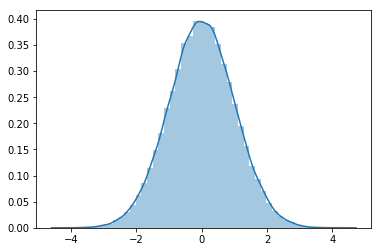

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.distplot(stats.norm.rvs(0, 1, size=100000))
plt.show()

As we can see, the normal distribution models anything that has symmetric density around it's mean.  A normal distribution is one where the data is as likely to be above or below it's center in value.  And it's values tail off around it's center.

So anything with a single massive epicenter will be well approximated by a normal distribution.  

## Poisson

A typical next example is the poisson distribution.  It is a commonly use distribution partially because if you have enough data, eventually poisson heads towards a normal distribution.  Let's see what this thing looks like:

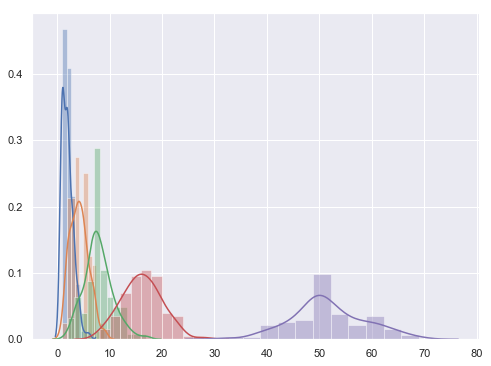

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(stats.poisson.rvs(1, loc=1, size=100)) # Blue
sns.distplot(stats.poisson.rvs(3, loc=1, size=100)) # Orange
sns.distplot(stats.poisson.rvs(7, loc=1, size=100)) # Green
sns.distplot(stats.poisson.rvs(15, loc=1, size=100)) # Red
sns.distplot(stats.poisson.rvs(50, loc=1, size=100)) # Purple
plt.show()

As you can see, the larger the shape parameter is for the poisson variable the close to normal it gets.  Additionally, Poisson random variables express the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.  Here the shape parameter is the modelers expectation of the average number of occurrences of the event in question over the time interval.

## Gamma

Next we look at the gamma random variable which heads to a chi-squared random variable asymptotically.  Let's take a look:

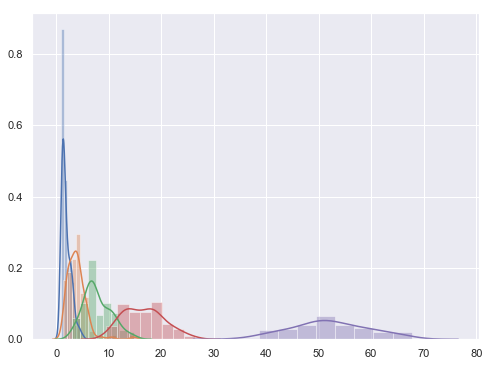

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(stats.gamma.rvs(1, loc=1, size=100)) # Blue
sns.distplot(stats.gamma.rvs(3, loc=1, size=100)) # Orange
sns.distplot(stats.gamma.rvs(7, loc=1, size=100)) # Green
sns.distplot(stats.gamma.rvs(15, loc=1, size=100)) # Red
sns.distplot(stats.gamma.rvs(50, loc=1, size=100)) # Purple
plt.show()

Perhaps unsurprisingly the gamma follows a similar pattern to the Poisson random variable, however notice it's not exactly the same.  A common use-case of Gamma distributions is to model wait times.  So it's similar to Poisson - modeling how long something takes to occur.  Except you are asking how long you are expected to wait, which is the other side of the coin.

## Time to Model Some Data!!!

### Poisson Regression

Note, that we pretty much fudge things just to show how one might setup a regression with Poisson distributed random variables:

In [10]:
crime_age = df[["CRIM", "AGE"]]
crime_age["CRIM"] = stats.poisson.rvs(df["CRIM"].mean(), loc=df["CRIM"].mean(), size=len(df))
crime_age["AGE"] = stats.poisson.rvs(df["AGE"].mean(), loc=df["AGE"].mean(), size=len(df))
crime_age["ZN"] = stats.poisson.rvs(df["ZN"].mean(), loc=df["ZN"].mean(), size=len(df))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Poisson Regression is great for any of the following situations:

* calls at a call-centre
* number of customers
* doctor visits
* bank failures
* insurance claims
* patents

This is because each of these variables are _discrete_, _positive_ and a _function of time_.  Let's see how to make use of the model with the data we already have available:

In [11]:
import statsmodels.api as sm

poisson = sm.families.Poisson()
starting_mu = poisson.starting_mu(y=crime_age["AGE"])
model = sm.GLM(crime_age["CRIM"], crime_age["AGE"], family=sm.families.Poisson())
result = model.fit(starting_mu=starting_mu)
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   CRIM   No. Observations:                  506
Model:                            GLM   Df Residuals:                      505
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.6
Date:                Tue, 08 Jan 2019   Deviance:                       302.49
Time:                        08:51:50   Pearson chi2:                     311.
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0139      0.000    111.824      0.000       0.014       0.014


## Goodness of Fit

Inorder to determine goodness of fit we look at the ratio of the Deviance to the degrees of freedom -

$\frac{302.49}{506} \approx 0.5977 $

The question we ask is a simple one, is the ratio greater than 1?

In our case it is not, which means our model probably fits decently well.

Reference:

[Goodness of fit](https://newonlinecourses.science.psu.edu/stat504/node/223/)

### Parameter Interpretation

Recall that a Poisson distribution models the probability of a given number of events occurring over a fixed interval.  This translates to Poisson regression in that the dependent variable is assumed to be a count variable.  Also, it is assumed that all observations are recorded with the same time duration between recordings.  So for this example, it is assumed that all housing prices are observed with a fixed time interval seperating the recording.  Of course, that isn't the case for this data, but we take it as such, for the sake of the example.  We also assume our data is count data, that is it takes on only non-negative values.

Another important concern is over or under dispersion.  Because Poisson variables are assumed to have the same mean and variance, if the mean < variance they are said to be overdispersed and if mean > variance the variable is said to be underdispersed.  We'll see other models to use when this is the case.

Now that we have set out all the requirements of Poisson Regression, we are ready to see how to analyze the coefficients:

For Poisson regression models we treat the log of the expected count as a function of the predictor variables. We can interpret the Poisson regression coefficient as follows: 

for a _one unit change_ in the predictor variable, the difference in the logs of expected counts is _expected to change_ by the respective regression coefficient, given the other predictor variables in the model are held constant.


Let's see how this holds for our specific model:

Reference:

[Poisson Regression](https://stats.idre.ucla.edu/stata/output/poisson-regression/)

In [12]:
import statsmodels.api as sm
poisson = sm.families.Poisson()
starting_mu = poisson.starting_mu(y=crime_age["AGE"])
model = sm.GLM(crime_age["CRIM"], crime_age["AGE"], family=sm.families.Poisson())
result = model.fit(starting_mu=starting_mu)
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   CRIM   No. Observations:                  506
Model:                            GLM   Df Residuals:                      505
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1096.6
Date:                Tue, 08 Jan 2019   Deviance:                       302.49
Time:                        08:52:38   Pearson chi2:                     311.
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0139      0.000    111.824      0.000       0.014       0.014


This is the Poisson regression estimate for a one unit increase in AGE, would likely lead to the difference in the logs of expected counts of per capita crime rate by town would be expected to increase by 0.0136.  Because this is a log linear model, we need to take the log on both sides to recover the effect in terms of the dependent variable.  Therefore:

$$ log(CRIM) = \theta * AGE + c $$

$$ e^{log(CRIM)} = e^{\theta*AGE + c} $$

$$ CRIM = e^{\theta*AGE} * e^{c} $$


Therefore, to interpret $\theta = 0.0139$ we simply do:

$$ e^{0.0139} \approx 1.0139 $$

So, a 1000 change in proportion of owner-occupied units built prior to 1940 leads to an increase in per capita crime rate by town by 139.

References:

[Poisson Regression Analysis](http://www.pauldickman.com/survival/handouts/22%20-%20EoB%20Poisson%20Regression.pdf)
[derivation of why](https://stats.stackexchange.com/questions/128926/how-to-interpret-parameter-estimates-in-poisson-glm-results)

As you can see, we assume a Poisson distributed random variable and we are able to fit the data quite well!  Let's run the same experiment for gamma distributed data.

### Gamma Regression

Again here we fudge the data since we don't have anything that's gamma distributed.

In [13]:
crime_age = df[["CRIM", "AGE"]]
crime_age["CRIM"] = stats.gamma.rvs(df["CRIM"].mean(), loc=df["CRIM"], size=len(df))
crime_age["AGE"] = stats.gamma.rvs(df["AGE"].mean(), loc=df["AGE"], size=len(df))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
gamma = sm.families.Gamma()
starting_mu = gamma.starting_mu(y=crime_age["AGE"])
model = sm.GLM(crime_age["CRIM"], crime_age["AGE"], family=sm.families.Gamma())
result = model.fit(starting_mu=starting_mu)
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   CRIM   No. Observations:                  506
Model:                            GLM   Df Residuals:                      505
Model Family:                   Gamma   Df Model:                            0
Link Function:          inverse_power   Scale:                          1.8884
Method:                          IRLS   Log-Likelihood:                -1646.4
Date:                Tue, 08 Jan 2019   Deviance:                       471.37
Time:                        08:53:47   Pearson chi2:                     954.
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE            0.0009   5.66e-05     16.369      0.000       0.001       0.001


/usr/local/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


## Goodness of Fit

We can run the same analysis here as we did for Poisson Regression:

Inorder to determine goodness of fit we look at the ratio of the Deviance to the degrees of freedom -

$\frac{471.37}{506} \approx 0.93156 $

The question we ask is a simple one, is the ratio greater than 1?

In our case it is not, which means our model probably fits okay.

Reference:

[Goodness of fit](https://newonlinecourses.science.psu.edu/stat504/node/223/)

## Parameter Interpretation

The parameter interpretation is based on the link function.  In this case the inverse power function is used, therefore we interpret our coeficient as $ \theta^{-1} $ with respect to a change in $ \hat{y}$ Therefore:

$$ CRIM^{-1} = \theta * AGE + c $$

$$ CRIM = \frac{1}{\theta}*AGE + \frac{1}{c} $$


Therefore, to interpret $\theta = 0.0009$ we simply do:

$$ \frac{1}{0.0009} \approx 1111.11 $$

So, a 1 change in proportion of owner-occupied units built prior to 1940 leads to an increase in per capita crime rate by town by 1111.11.

References:

[explaination of link functions](https://www.sagepub.com/sites/default/files/upm-binaries/21121_Chapter_15.pdf)

## Hierarchical Models

Next we will look at hierarchical models.  A hierarchical model consider dependency structures within your data.  This becomes the data when different aspects of your data are segregated based on some grouping condition that is deterministic.  The classical example is that of children attending a school:

Perhaps we want to regress a model to find GPA.  Well there are certain fixed attributes we'll want to consider and control for explicitly:
* grade level
* number of students per class
* class subjects
* level of difficulty of class
* etc.

The point being - there are certain segregating factors that are clearly important and yet are not germain to the individual.  A student doesn't get to choose their class size or grade level, so it should be controlled for!

In linear regression the way we control for this is with two variants:
* Fixed effects models
* Mixed effects models

A fixed effects model assumes that the hierarchical grouping of your data is correlated with the dependent variable, whereas the mixed effects model does not assume they are.

Before we jump straight into modeling, let's get a sense of how to deal with data that is inherently hierarchical.  For this, we'll need a new tool (for some) called the groupby.

A groupby groups data by some group, let's see an example:

In [52]:
from scipy import stats
import seaborn as sns
from sklearn import datasets
import statsmodels.formula.api as smf
import pandas as pd

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
titanic = titanic[titanic["embark_town"].notnull()]
titanic = titanic[titanic["age"].notnull()]
titanic["female"] = pd.get_dummies(titanic["sex"])["female"]
titanic = pd.concat([titanic, pd.get_dummies(titanic["embark_town"])], axis=1)
titanic = pd.concat([titanic, pd.get_dummies(titanic["class"])], axis=1)
titanic["alone"] = titanic["alone"].astype(int)

cols = titanic.columns.tolist()
cols.remove("survived")
cols.remove("pclass")
cols.remove("sibsp")
cols.remove("parch")
cols.remove("alive")
cols.remove("who")
cols.remove("embarked")
cols.remove("sex")
cols.remove("embark_town")
cols.remove("class")
cols.remove("deck")
cols.remove("adult_male")
titanic = titanic[cols]

In [54]:
titanic.head()

,age,fare,alone,female,Cherbourg,Queenstown,Southampton,First,Second,Third
0,22.0,7.2500,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,1,1,0,0,1,0,0
2,26.0,7.9250,1,1,0,0,1,0,0,1
3,35.0,53.1000,0,1,0,0,1,1,0,0
4,35.0,8.0500,1,0,0,0,1,0,0,1


In [63]:
mixed_model = smf.mixedlm("fare ~ female + First + Third", titanic, groups=titanic["Cherbourg"])
mdf = mixed_model.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: fare      
No. Observations: 712     Method:             REML      
No. Groups:       2       Scale:              1738.9318 
Min. group size:  130     Likelihood:         -3657.7011
Max. group size:  582     Converged:          Yes       
Mean group size:  356.0                                 
--------------------------------------------------------
             Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------
Intercept    22.020    8.097  2.719 0.007   6.150 37.891
female       11.742    3.301  3.557 0.000   5.272 18.212
First        62.050    4.636 13.383 0.000  52.963 71.137
Third        -6.981    3.898 -1.791 0.073 -14.620  0.658
Group Var    99.319    3.685                            



## References:

* http://seaborn.pydata.org/examples/horizontal_barplot.html?highlight=car%20crashes
* https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
* https://www.forbes.com/sites/johnsonpierr/2017/06/15/with-the-public-clouds-of-amazon-microsoft-and-google-big-data-is-the-proverbial-big-deal/#6e5918692ac3
* https://stats.stackexchange.com/questions/59250/how-to-interpret-the-output-of-the-summary-method-for-an-lm-object-in-r
* https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
* https://www.programcreek.com/python/example/62037/scipy.stats.entropy
* https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC
* https://scipy-cookbook.readthedocs.io/index.html
* https://austinrochford.com/posts/2015-03-03-mle-python-statsmodels.html
* http://nbviewer.jupyter.org/gist/AustinRochford/92b06d174a7f84fded6e
* https://stats.stackexchange.com/questions/37461/the-relationship-between-the-gamma-distribution-and-the-normal-distribution
* https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
* https://stats.idre.ucla.edu/stata/output/poisson-regression/
* https://en.wikipedia.org/wiki/Count_data
* https://en.wikipedia.org/wiki/Overdispersion
* https://www.statsdirect.com/help/regression_and_correlation/poisson.htm
* https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Poisson_Regression.pdf
* http://www.pauldickman.com/survival/handouts/22%20-%20EoB%20Poisson%20Regression.pdf
* https://stats.stackexchange.com/questions/128926/how-to-interpret-parameter-estimates-in-poisson-glm-results
* http://home.cc.umanitoba.ca/~godwinrt/7010/poissonregression.pdf
* https://newonlinecourses.science.psu.edu/stat504/node/223/
* https://newonlinecourses.science.psu.edu/stat504/node/4/
* https://www.sagepub.com/sites/default/files/upm-binaries/21121_Chapter_15.pdf